<a href="https://colab.research.google.com/github/Steven-Macas/redes-neuronales-SAA/blob/main/SSA_stevenMacas_red_neuronal_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neuronales**

---

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

---

# **A** -Importación de librerías

In [1]:
!pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# instalación de librería gráfica para ver cómo evoluciona la función de pérdida
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf # importación de módulos de keras y gráficos
from IPython.display import SVG
import livelossplot
import math

---


# **B** - Preproceso

In [4]:
data = pd.read_csv('WineQT.csv') #Dataset del vino



---



In [5]:
data = data.drop('Id', axis = 1)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5




---



In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


---

<Axes: >

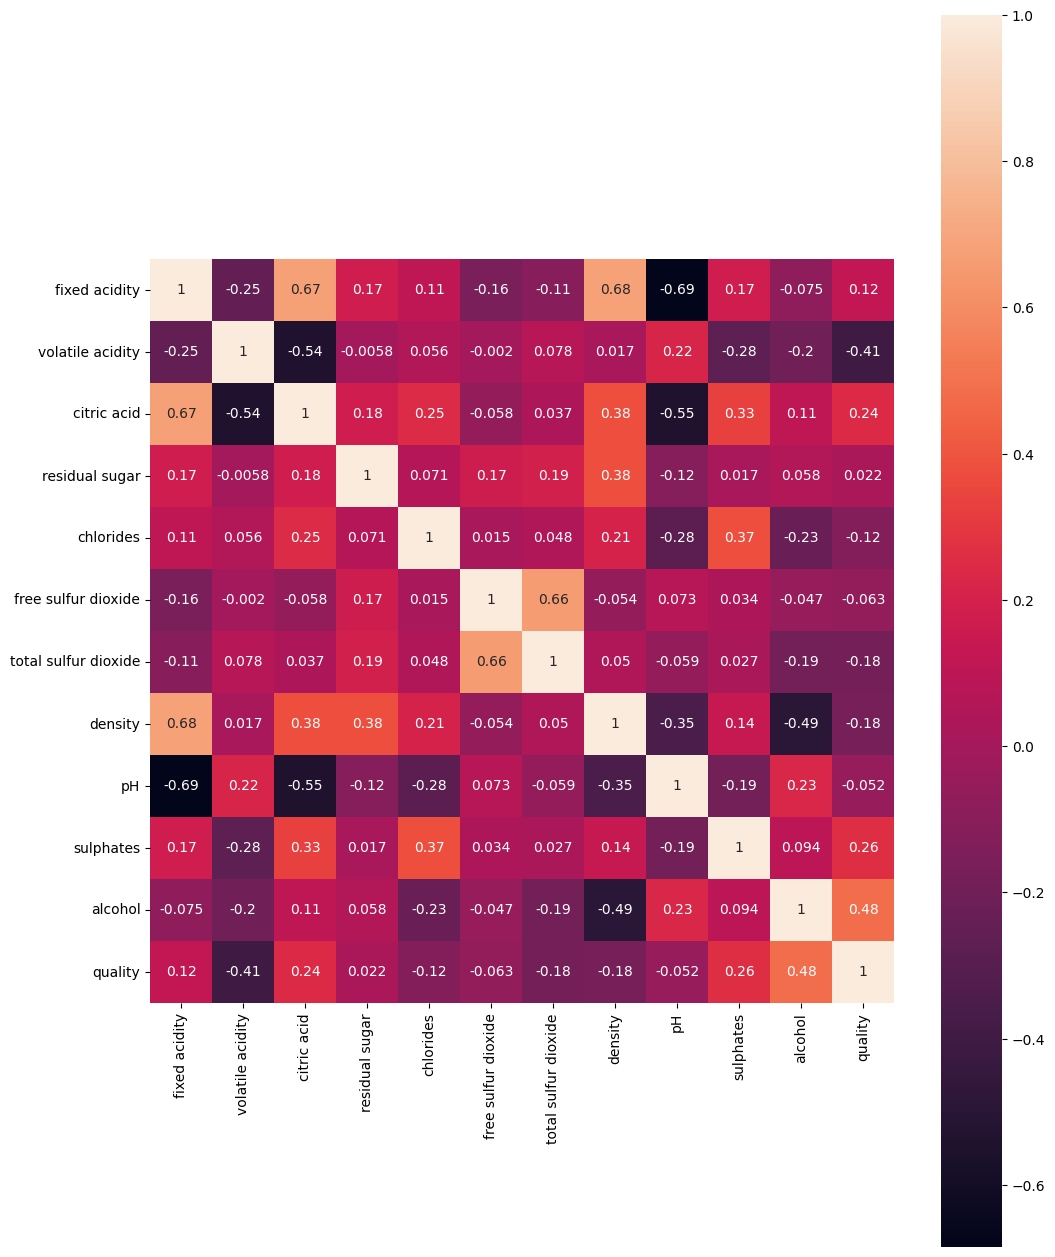

In [ ]:
#Mapa de Calor del DataFrame del Vino
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

---

**La característica que tendremos en cuenta para el estudio será la Calidad del vino**



In [6]:
#separamos datos de entrada y salida VINO
x_data = data.drop('quality', axis=1)
y_data = data['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# **C** - Entrenamiento y Predicción

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

# ***D*** - Evaluación

In [ ]:
print(accuracy_score(y_test,y_predict)) #0.5093240093240093 - Tenemos un porcentaje del 50,93% de acierto
y_predict

0.5093240093240093


array([6, 5, 7, 6, 3, 7, 5, 6, 5, 5, 7, 5, 3, 6, 7, 6, 3, 5, 5, 7, 5, 7,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 4, 6, 6, 5, 8, 6, 7, 6,
       3, 6, 7, 5, 5, 4, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 5, 6,
       5, 5, 6, 4, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 7, 6, 6, 5, 6,
       6, 6, 3, 6, 7, 7, 6, 5, 6, 7, 7, 5, 6, 7, 6, 8, 5, 7, 6, 3, 5, 6,
       6, 3, 6, 5, 7, 6, 5, 5, 6, 5, 5, 3, 8, 6, 5, 6, 5, 3, 6, 6, 5, 6,
       6, 6, 7, 7, 5, 5, 5, 5, 6, 6, 7, 5, 6, 7, 6, 4, 6, 6, 6, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 7, 5, 7, 3, 7, 5, 7, 6, 7,
       6, 6, 6, 7, 7, 8, 6, 7, 5, 6, 7, 6, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6,
       4, 5, 6, 3, 4, 5, 6, 4, 6, 6, 3, 5, 6, 5, 5, 5, 6, 7, 6, 3, 6, 7,
       7, 6, 6, 6, 6, 7, 6, 5, 6, 5, 5, 5, 7, 7, 5, 6, 5, 5, 5, 7, 5, 5,
       5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 7, 6, 6, 5, 7, 6, 5, 5, 6, 7, 5,
       5, 6, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 7, 4, 7, 6, 6, 5, 5, 6, 5, 6,
       5, 6, 5, 5, 3, 6, 5, 6, 5, 6, 7, 5, 5, 5, 6,

[]

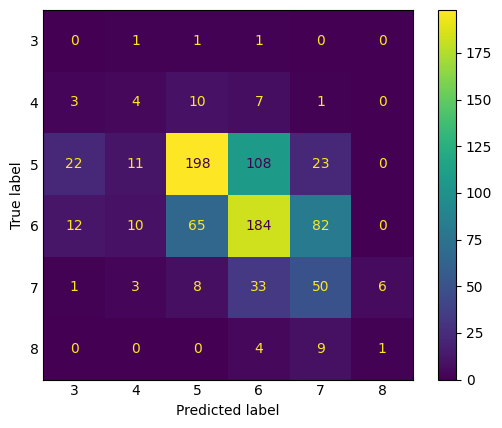

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.plot(b=None)



---

## **E** - Optimización

MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print(accuracy_score(y_test,y_predict)) #0.32867132867132864 - Tenemos un porcentaje del 32,86% de acierto
y_predict

0.32867132867132864


array([7, 5, 5, 3, 3, 7, 5, 6, 7, 5, 6, 5, 5, 6, 3, 5, 6, 4, 5, 6, 5, 3,
       7, 3, 5, 5, 5, 6, 6, 3, 5, 5, 3, 5, 5, 5, 3, 7, 3, 5, 4, 6, 6, 6,
       3, 5, 3, 6, 5, 5, 5, 6, 3, 5, 6, 5, 5, 5, 3, 3, 5, 3, 7, 3, 3, 7,
       3, 3, 3, 5, 3, 3, 6, 3, 5, 7, 5, 5, 5, 7, 3, 5, 6, 5, 5, 7, 5, 5,
       3, 6, 5, 7, 5, 7, 5, 5, 6, 5, 3, 5, 7, 5, 6, 5, 5, 3, 3, 3, 5, 3,
       7, 7, 3, 6, 5, 5, 5, 5, 3, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 3, 3,
       7, 3, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 3, 7, 6, 3, 5, 3, 6, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 7, 3, 5, 6, 5, 5, 3, 4, 6, 5, 5, 7, 7, 3, 5,
       7, 3, 5, 7, 6, 4, 5, 3, 7, 3, 6, 5, 5, 5, 3, 3, 7, 7, 5, 5, 6, 3,
       5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 3, 3, 5, 3, 6,
       3, 3, 6, 5, 5, 6, 5, 6, 5, 6, 3, 5, 3, 3, 5, 7, 6, 5, 3, 7, 5, 6,
       5, 6, 5, 7, 5, 3, 3, 5, 3, 5, 3, 7, 5, 3, 7, 5, 3, 5, 3, 5, 5, 5,
       5, 6, 5, 7, 5, 5, 5, 3, 3, 6, 5, 5, 3, 5, 6, 5, 5, 5, 6, 6, 6, 5,
       5, 5, 5, 5, 3, 6, 5, 6, 5, 3, 3, 6, 5, 5, 6,

# **RED NEURONAL**

---



## Creación de modelo basado en una red neuronal

### **Definir el conjunto de entrenamiento**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(228, 10)

In [21]:
plot_losses = livelossplot.PlotLossesKeras()

### **Definir el modelo de red neuronal y Configurar el proceso de aprendizaje**

In [22]:
from keras. initializers import TruncatedNormal 
init = TruncatedNormal(stddev=0.01, seed=1)
# Build neural network
model = tf.keras.models.Sequential()
# Dense numero de neuronas, función de activación, ...
model.add(tf.keras.layers.Dense(len(x_train.columns)*2, activation='relu', input_shape=(len(x_train.columns),), kernel_initializer='he_uniform')) # entradas: dimension de la imagen
#model.add(tf.keras.layers.Dropout(0.5)) 
#model.add(tf.keras.layers.Dense(len(x_train.columns)*3, activation='relu')) # rectified linear unit 
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)) # 10 número de salidas


### **Entrenar el modelo**

In [23]:
batch_size = int(math.sqrt(len(x_train)))

In [24]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
# Definir el optimizador
optimizer = Adam(learning_rate=0.01)
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.75, patience=32, mode='max', verbose=0)
# Definir early stopping
early_stop = EarlyStopping(monitor='accuracy', patience=64, mode='max', verbose=0)
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=2500, batch_size=batch_size,use_multiprocessing=True,validation_data=(x_test,y_test),callbacks=[early_stop,reduce_lr])

Epoch 1/2500
16/16 [==============================] - 1s 19ms/step - loss: 0.3109 - accuracy: 0.4211 - val_loss: 0.2527 - val_accuracy: 0.4022 - lr: 0.0100
Epoch 2/2500
16/16 [==============================] - 0s 9ms/step - loss: 0.2421 - accuracy: 0.4474 - val_loss: 0.1990 - val_accuracy: 0.4940 - lr: 0.0100
Epoch 3/2500
16/16 [==============================] - 0s 13ms/step - loss: 0.2042 - accuracy: 0.4693 - val_loss: 0.1965 - val_accuracy: 0.5027 - lr: 0.0100
Epoch 4/2500
16/16 [==============================] - 0s 14ms/step - loss: 0.2009 - accuracy: 0.4868 - val_loss: 0.1997 - val_accuracy: 0.4951 - lr: 0.0100
Epoch 5/2500
16/16 [==============================] - 0s 14ms/step - loss: 0.2009 - accuracy: 0.4254 - val_loss: 0.2017 - val_accuracy: 0.4656 - lr: 0.0100
Epoch 6/2500
16/16 [==============================] - 0s 8ms/step - loss: 0.1954 - accuracy: 0.4868 - val_loss: 0.1992 - val_accuracy: 0.5016 - lr: 0.0100
Epoch 7/2500
16/16 [==============================] - 0s 8ms/step 

### **Evaluar el modelo**

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23209916055202484
Test accuracy: 0.5551912784576416


In [26]:
# Hacer predicciones con el modelo entrenado
y_pred = model.predict(x_test)

29/29 [==============================] - 0s 1ms/step


In [27]:
y_pred

array([[7.3772704e-09, 8.7837142e-09, 8.4560652e-09, ..., 1.2154612e-01,
        2.5741165e-05, 1.2738663e-08],
       [4.3354492e-05, 3.3718978e-05, 4.0528776e-05, ..., 1.2771909e-03,
        1.7269632e-07, 1.9473124e-05],
       [1.5408104e-06, 1.3475689e-06, 1.4607272e-06, ..., 5.1954580e-03,
        2.6772695e-05, 8.3139435e-07],
       ...,
       [3.3710783e-06, 3.4093973e-06, 3.4482246e-06, ..., 1.0400282e-02,
        2.7304017e-03, 3.0471710e-06],
       [2.3591922e-06, 1.6749946e-06, 2.2073314e-06, ..., 2.0119826e-04,
        2.2466731e-09, 8.6040296e-07],
       [3.5752892e-10, 3.8156592e-10, 3.7441994e-10, ..., 8.8207126e-02,
        3.1608755e-07, 4.8725912e-10]], dtype=float32)

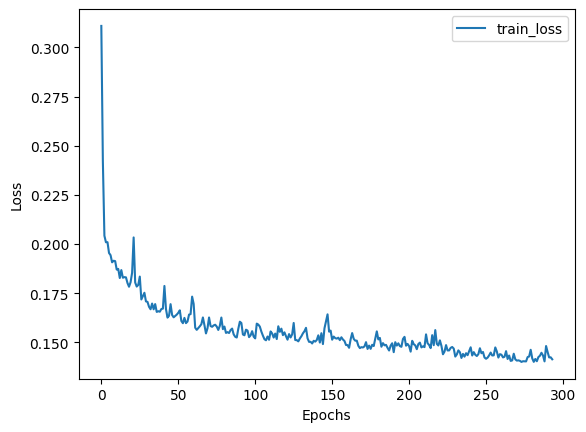

In [28]:
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

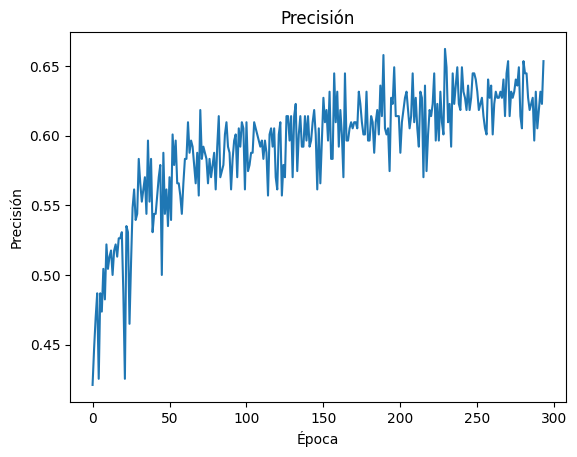

In [29]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

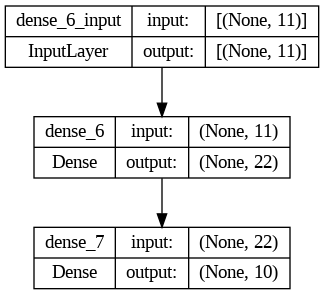

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

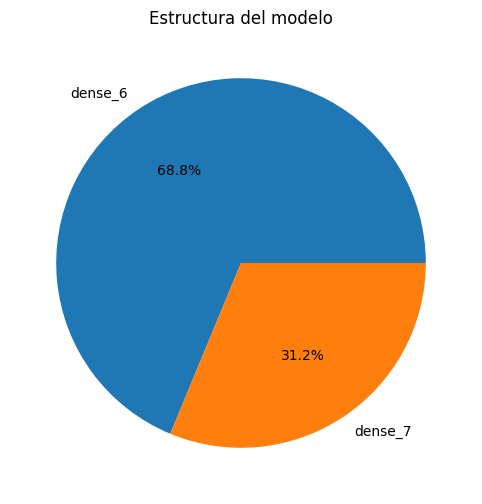

In [31]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

# **Conclusión**

---



Comenzando por el modelo Naive Bayes Gaussian, podemos observar que la precisión obtenida es del 50,93%. Este modelo es útil cuando las variables de entrada (en este caso, los parámetros del vino) siguen una distribución normal. Sin embargo, el modelo asume independencia entre las variables, lo que puede no ser siempre cierto. La precisión obtenida sugiere que el modelo no es muy efectivo en este caso, aunque es posible que se puedan realizar ajustes a los parámetros para mejorar su rendimiento.

El modelo Naive Bayes Multinomial tiene una precisión aún más baja del 32,87%. Este modelo es adecuado para datos discretos, como el conteo de palabras en un texto. Es posible que no sea el modelo más adecuado para este problema, ya que los parámetros del vino son continuos.

Por último, el modelo de red neuronal proporciona una precisión del 42,40% en un primer momento, después de varias modificaciones e intento en sus parámetros, se ha conseguido que aumente significativamente hasta el 55,52%. Este modelo es más flexible y poderoso que los anteriores, ya que es capaz de aprender patrones más complejos en los datos. El modelo Sequential de Keras que has utilizado es una arquitectura básica de red neuronal que utiliza capas densas completamente conectadas. 

Es importante tener en cuenta que la precisión obtenida aún no es muy alta, lo que sugiere que puede haber características importantes en los datos que aún no se están capturando correctamente. Es posible que se necesite una exploración más profunda de los datos y una ingeniería de características adecuada para mejorar la precisión del modelo.